In [1]:
from db_connection import create_connection, query_data, query_sql_file, select_table

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Connect to MIMIC-III dataset
con = create_connection()

In [4]:
img_path = '../data_viz_img/vital_signs/'
dataset_path = '../dataset/'

# Vital Signs for First Day of Admission

In [5]:
script = query_sql_file('../sql_scripts/vital_signs/vital_signs_first_day.sql', con)
df = query_data(script[0], con)
df.head()

,subject_id,hadm_id,icustay_id,heartrate_min,heartrate_max,heartrate_mean,sysbp_min,sysbp_max,sysbp_mean,diasbp_min,...,spo2_mean,glucose_min,glucose_max,glucose_mean,ph_min,ph_max,ph_mean,weight_min,weight_max,weight_mean
0,2,163353,243653,140.0,140.0,140.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,145834,211552,75.0,168.0,111.785714,64.0,217.0,102.960000,28.0,...,97.870968,136.0,306.0,232.416667,7.26,7.59,7.36,96.800003,96.800003,96.800003
2,4,185777,294638,74.0,111.0,89.217391,97.0,139.0,118.000000,55.0,...,97.500000,153.0,266.0,199.666667,NaN,NaN,NaN,NaN,NaN,NaN
3,6,107064,228232,76.0,100.0,84.160000,127.0,187.0,153.647059,40.0,...,99.200000,102.0,181.0,148.500000,NaN,NaN,NaN,NaN,NaN,NaN
4,7,118037,236754,115.0,121.0,118.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.to_csv('../dataset/firstday_vital_signs.csv')

In [7]:
# Handling Missing Data
vital_signs = [col for col in df.columns if col not in ['subject_id', 'hadm_id', 'icustay_id']]
for vital_sign in vital_signs:
    df[vital_sign].fillna(df[vital_sign].median(), inplace=True)

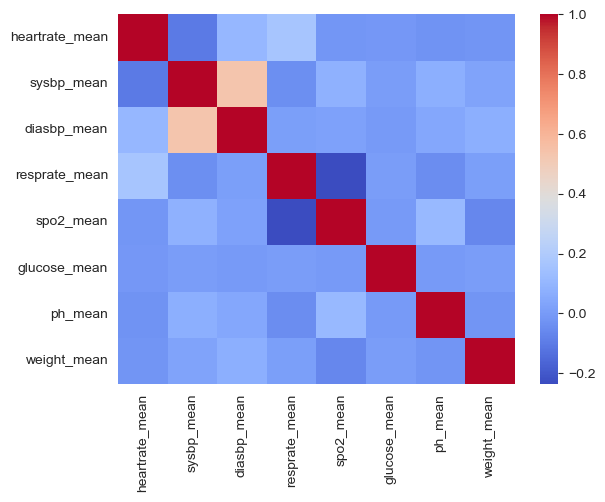

In [8]:
# Correlation Matrix Plot
vital_signs = ['heartrate_mean', 'sysbp_mean', 'diasbp_mean', 'resprate_mean',
               'spo2_mean', 'glucose_mean', 'ph_mean', 'weight_mean']
corr = df[vital_signs].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')
plt.savefig('../data_viz_img/corr_vital_signs.png')
plt.show()

In [9]:
admissions = pd.read_csv('../dataset/patient_stay_data.csv')
admissions.head()

,subject_id,hadm_id,admission_type,admission_location,ethnicity,hospital_expire_flag,total_los,gender,expire_flag,age_at_admission,...,Diseases Of The Genitourinary System,Complications Of Pregnancy Childbirth And The Puerperium,Diseases Of The Skin And Subcutaneous Tissue,Diseases Of The Musculoskeletal System And Connective Tissue,Congenital Anomalies,Certain Conditions Originating In The Perinatal Period,Symptoms Signs And Ill-Defined Conditions,Injury And Poisoning,Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services,Supplementary Classification Of External Causes Of Injury And Poisoning
0,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,WHITE,0,1.14,F,0,65,...,0,0,0,0,0,0,0,1,0,1
1,23,152223,ELECTIVE,PHYS REFERRAL/NORMAL DELI,WHITE,0,5.50,M,0,71,...,1,0,0,0,0,0,0,0,1,0
2,23,124321,EMERGENCY,TRANSFER,WHITE,0,6.77,M,0,75,...,0,0,0,0,0,0,1,0,1,0
3,24,161859,EMERGENCY,TRANSFER,WHITE,0,2.86,M,0,39,...,0,0,0,0,0,0,0,0,0,0
4,25,129635,EMERGENCY,EMERGENCY ROOM ADMIT,WHITE,0,3.53,M,0,59,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df2 = pd.merge(df[['hadm_id', 'subject_id', 'icustay_id'] + vital_signs], admissions[['hadm_id', 'subject_id', 'icustay_id', 'hospital_expire_flag']], on=['hadm_id', 'subject_id', 'icustay_id'], how='left')

In [11]:
df2.head()

,hadm_id,subject_id,icustay_id,heartrate_mean,sysbp_mean,diasbp_mean,resprate_mean,spo2_mean,glucose_mean,ph_mean,weight_mean,hospital_expire_flag
0,163353,2,243653,140.000000,116.473684,59.590909,18.189833,97.529412,128.200000,7.38,77.400000,0
1,145834,3,211552,111.785714,102.960000,55.720000,17.361111,97.870968,232.416667,7.36,96.800003,0
2,185777,4,294638,89.217391,118.000000,69.000000,25.352941,97.500000,199.666667,7.38,77.400000,0
3,107064,6,228232,84.160000,153.647059,56.558824,12.320000,99.200000,148.500000,7.38,77.400000,0
4,118037,7,236754,118.000000,116.473684,59.590909,18.189833,97.529412,128.200000,7.38,77.400000,0


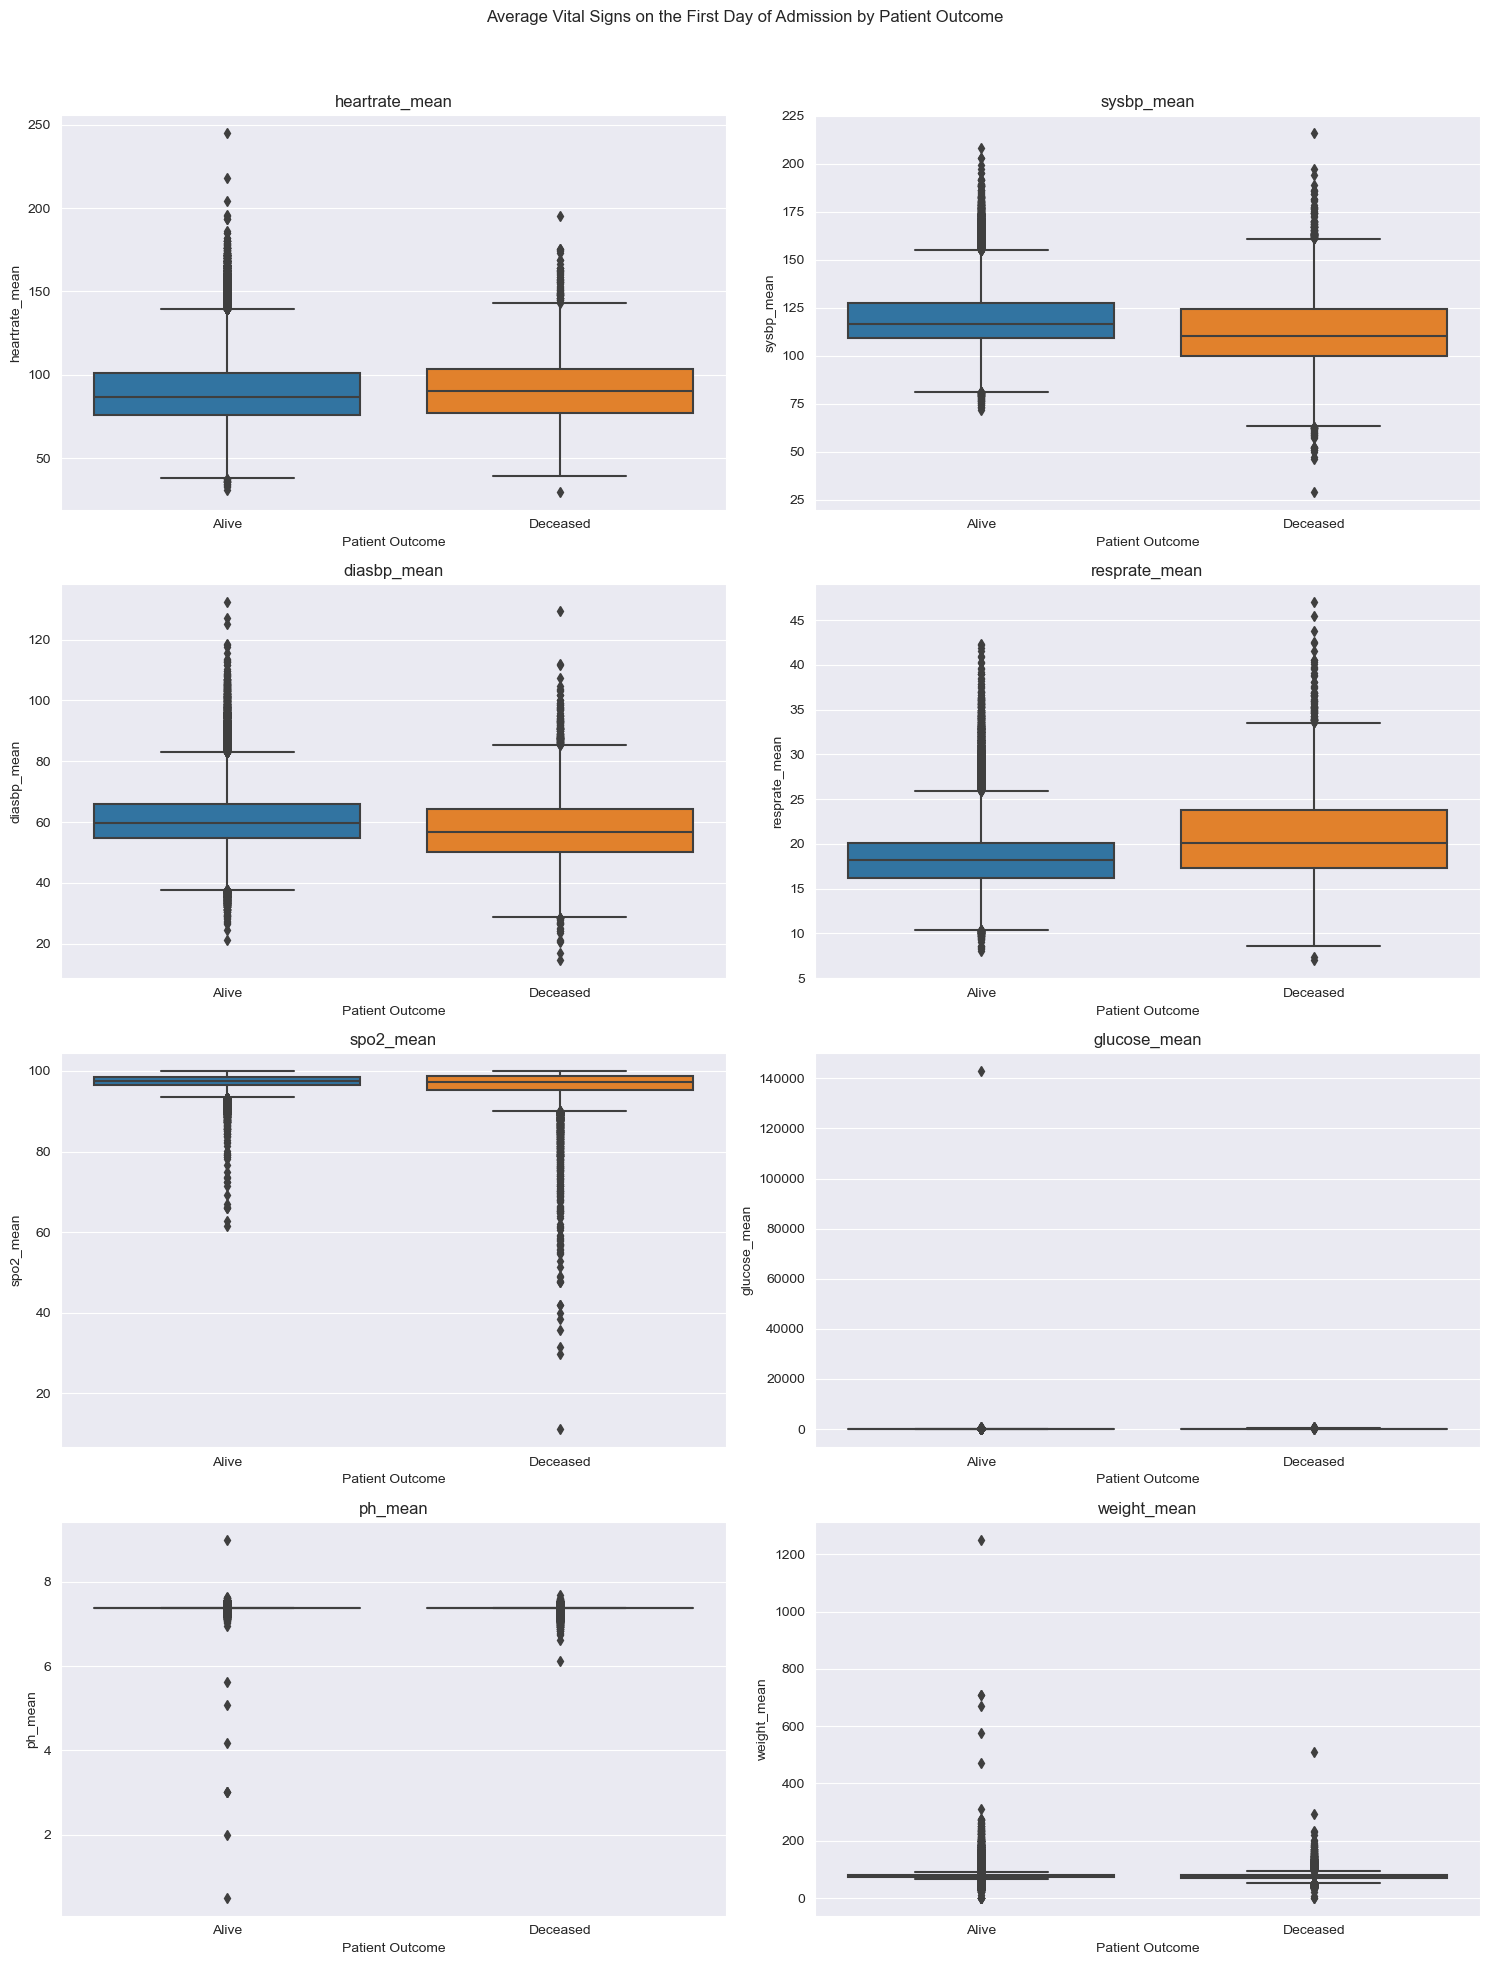

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 4x2 subplots
axes = axes.ravel()

fig.suptitle('Average Vital Signs on the First Day of Admission by Patient Outcome')
for i, vital_sign in enumerate(vital_signs):
    sns.boxplot(x='hospital_expire_flag', y=vital_sign, data=df2, ax=axes[i])
    axes[i].set_title(f'{vital_sign}')
    axes[i].set_xlabel('Patient Outcome')
    axes[i].set_xticks([0, 1], ['Alive', 'Deceased'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{img_path}01_Average Vital Signs on the First Day of Admission.png')
plt.show()

### Feature Importance

In [13]:
df2 = pd.merge(df, admissions[['hadm_id', 'subject_id', 'icustay_id', 'hospital_expire_flag']], on=['hadm_id', 'subject_id', 'icustay_id'], how='left')
df2.head()

,subject_id,hadm_id,icustay_id,heartrate_min,heartrate_max,heartrate_mean,sysbp_min,sysbp_max,sysbp_mean,diasbp_min,...,glucose_min,glucose_max,glucose_mean,ph_min,ph_max,ph_mean,weight_min,weight_max,weight_mean,hospital_expire_flag
0,2,163353,243653,140.0,140.0,140.000000,91.0,147.0,116.473684,43.0,...,102.0,158.0,128.200000,7.34,7.42,7.38,77.400000,77.400002,77.400000,0
1,3,145834,211552,75.0,168.0,111.785714,64.0,217.0,102.960000,28.0,...,136.0,306.0,232.416667,7.26,7.59,7.36,96.800003,96.800003,96.800003,0
2,4,185777,294638,74.0,111.0,89.217391,97.0,139.0,118.000000,55.0,...,153.0,266.0,199.666667,7.34,7.42,7.38,77.400000,77.400002,77.400000,0
3,6,107064,228232,76.0,100.0,84.160000,127.0,187.0,153.647059,40.0,...,102.0,181.0,148.500000,7.34,7.42,7.38,77.400000,77.400002,77.400000,0
4,7,118037,236754,115.0,121.0,118.000000,91.0,147.0,116.473684,43.0,...,102.0,158.0,128.200000,7.34,7.42,7.38,77.400000,77.400002,77.400000,0


In [14]:
from preprocessing import apply_feature_importance

In [15]:
numerical_features = df.drop(columns=['hadm_id', 'subject_id', 'icustay_id']).columns
df_scaled = apply_feature_importance.scale_features(df=df2, numerical_features=numerical_features)

df_scaled.head()

,subject_id,hadm_id,icustay_id,hospital_expire_flag,heartrate_min,heartrate_max,heartrate_mean,sysbp_min,sysbp_max,sysbp_mean,...,spo2_mean,glucose_min,glucose_max,glucose_mean,ph_min,ph_max,ph_mean,weight_min,weight_max,weight_mean
0,2,163353,243653,0,2.678545,1.142139,2.093863,-0.055722,-0.090064,-0.131993,...,0.138887,-0.119739,-0.008222,-0.017497,0.049341,0.009312,0.029991,-0.097117,-0.097533,-0.097333
1,3,145834,211552,0,-0.105950,2.197617,0.871201,-1.618758,2.989291,-0.969394,...,0.275333,0.883344,0.027816,0.159711,-0.847840,2.745446,-0.282829,0.925514,0.924933,0.925290
2,4,185777,294638,0,-0.148788,0.048965,-0.106794,0.291620,-0.441990,-0.037412,...,0.127137,1.384885,0.018076,0.104024,0.049341,0.009312,0.029991,-0.097117,-0.097533,-0.097333
3,6,107064,228232,0,-0.063111,-0.365687,-0.325956,2.028327,1.669568,2.171523,...,0.806263,-0.119739,-0.002622,0.017021,0.049341,0.009312,0.029991,-0.097117,-0.097533,-0.097333
4,7,118037,236754,0,1.607586,0.425922,1.140496,-0.055722,-0.090064,-0.131993,...,0.138887,-0.119739,-0.008222,-0.017497,0.049341,0.009312,0.029991,-0.097117,-0.097533,-0.097333


In [16]:
df_scaled = pd.concat([df2['hospital_expire_flag'], df_scaled], axis=1)
df_scaled.head()

,hospital_expire_flag,subject_id,hadm_id,icustay_id,hospital_expire_flag,heartrate_min,heartrate_max,heartrate_mean,sysbp_min,sysbp_max,...,spo2_mean,glucose_min,glucose_max,glucose_mean,ph_min,ph_max,ph_mean,weight_min,weight_max,weight_mean
0,0,2,163353,243653,0,2.678545,1.142139,2.093863,-0.055722,-0.090064,...,0.138887,-0.119739,-0.008222,-0.017497,0.049341,0.009312,0.029991,-0.097117,-0.097533,-0.097333
1,0,3,145834,211552,0,-0.105950,2.197617,0.871201,-1.618758,2.989291,...,0.275333,0.883344,0.027816,0.159711,-0.847840,2.745446,-0.282829,0.925514,0.924933,0.925290
2,0,4,185777,294638,0,-0.148788,0.048965,-0.106794,0.291620,-0.441990,...,0.127137,1.384885,0.018076,0.104024,0.049341,0.009312,0.029991,-0.097117,-0.097533,-0.097333
3,0,6,107064,228232,0,-0.063111,-0.365687,-0.325956,2.028327,1.669568,...,0.806263,-0.119739,-0.002622,0.017021,0.049341,0.009312,0.029991,-0.097117,-0.097533,-0.097333
4,0,7,118037,236754,0,1.607586,0.425922,1.140496,-0.055722,-0.090064,...,0.138887,-0.119739,-0.008222,-0.017497,0.049341,0.009312,0.029991,-0.097117,-0.097533,-0.097333


In [ ]:
# # Applying Feature Importance using Random Forest
# rf_importance, rf_accuracies = apply_feature_importance.get_feature_importance(df=df_scaled, classifier='rf')
#
# for feature, importance in rf_importance:
#     print(f"Feature: {feature}, Importance: {importance}")